# Thai news classification based on their headlines
# AI จัดหมวดหมู่ข่าวไทยโดยใช้การพาดหัวข่าว
## by Wisarut Duangmorakot - wisarut.bank@gmail.com

- Dataset ข่าวตั้งแต่ปี พ.ศ. 2556 - พ.ศ.2561 ทั้งสิ้นกว่า 300,000+ ข่าว ซึ่งได้มาจากการเขียน Script ดึงข้อมูลจากเว็บไซต์ข่าวสำนักนึงของไทย ทำให้ไม่สามารถเปิดเผยข้อมูลได้ โดยได้นำหัวข้อข่าวหลักๆทั้งหมด 6 หมวดหมู่คือ <b> การเมือง, อาชญากรรม, ข่าวเศรษฐกิจ, ข่าวบันเทิง, ข่าวไอที และ ข่าวกีฬา </b> เป็นจำนวนทั้งสิ้น 200,000+ หัวข้อข่าว
- Dataset จะอยู่ในรูปแบบของ text file แบ่งแยกเป็นโฟลเดอร์ตามหมวดหมู่ของข่าว มีหัวข้อของข่าวอยู่ข้างในไฟล์
- เราจะทำการจัดหมวดหมู่ข่าวโดยใช้การพาดหัวข่าว โดยจัดเป็น ทั้ง 6 หมวดหมู่
- เน้นการนำเสนอประโยชน์ของการนำ AI ไปใช้งานจริง ไม่เน้นประสิทธิภาพ ซึ่งสามารถพัฒนาและ tune ให้ดีขึ้นได้ในภายหลังหากต้องการนำไปใช้จริง

### Import libraries

In [1]:
import os #ใช้ในการเปิดไฟล์ทั้งหมดใน Directory ขึ้นมาอ่าน
from pythainlp import word_tokenize #ใช้ pythainlp ช่วยตัดคำภาษาไทย เช่น ฉันกำลังขึ้นรถไฟ -> 'ฉัน','กำลัง','ขึ้น','รถไฟ'
from sklearn.metrics import accuracy_score # ใช้เพื่อเพื่อวัดประสิทธิความแม่นยำของโมเดล
from sklearn.metrics import confusion_matrix # ใช้เพื่อเพื่อวัดประสิทธิภาพโมเดล
import re #ใช้ในการกำจัดตัวอักษรหรือคำที่ไม่ต้องการออกไป

### Import data

In [3]:
news = []

politics = 0
sports = 0
crime = 0
economy = 0
entertain = 0
health = 0
IT = 0

path = './politics/'
for filename in os.listdir(path): # เปิดไฟล์ทุกไฟล์ในโฟลเดอร์ politics
    f = open(path+filename,'r') # เปิดไฟล์ด้วยโหมดอ่าน
    text = f.read()
    text = text.replace(' ','') # ลบเว้นวรรคออกจากพาดหัวข่าว
    text = text.replace('"','')
    news.append(text)
    f.close()
    politics += 1
 
print ("politics: ",politics,"ex :", text)
    
path = './crime/'
for filename in os.listdir(path):
    f = open(path+filename,'r') 
    text = f.read()
    text = text.replace(' ','')
    text = text.replace('"','')
    news.append(text)
    f.close()
    crime += 1
    
print ("crime: ",crime,"ex :", text)
    
path = './economy/'
for filename in os.listdir(path):
    f = open(path+filename,'r') 
    text = f.read()
    text = text.replace(' ','')
    text = text.replace('"','')
    news.append(text)
    f.close()
    economy += 1
    
print ("economy: ",economy,"ex :", text)
    
    
path = './entertain/'
for filename in os.listdir(path):
    f = open(path+filename,'r') 
    text = f.read()
    text = text.replace(' ','')
    text = text.replace('"','')
    news.append(text)
    f.close()
    entertain += 1
    
print ("entertain: ",entertain,"ex :", text)
    
path = './IT/'
for filename in os.listdir(path):
    f = open(path+filename,'r') 
    text = f.read()
    text = text.replace(' ','')
    text = text.replace('"','')
    news.append(text)
    f.close()
    IT += 1
    
print ("IT: ",IT,"ex :", text)
    
path = './sports/'
for filename in os.listdir(path):
    f = open(path+filename,'r') 
    text = f.read()
    text = text.replace(' ','')
    text = text.replace('"','')
    news.append(text)
    f.close()
    sports += 1

print ("sports: ",sports,"ex :", text)

print ("total: ", sports+IT+health+entertain+economy+crime+politics)

politics:  60568 ex : มอบ​​สม​ช.​รวบ​รวม​ข้อมูล​ชง​​เลิก​พ.ร.ก.​ฉุกเฉิน​
crime:  31852 ex : 'บิ๊กแป๊ะ'อ้างติดประชุมแจง'บิ๊กตู่-บิ๊กป้อม'ชวดจับพระดัง
economy:  31473 ex : ตลาดรับสร้างบ้านปี57หด
entertain:  24934 ex : พชร์ปรี๊ดด่ายับตลกหญิงพวกลืมกำพืดตัวเอง
IT:  10295 ex : จันทร์นี้กสท.พิจารณาจัดลำดับวันประมูลคลื่นความถี่ทีวีดิจิทัล
sports:  67790 ex : ไทเกอร์หายไม่ทันหวดยูเอสโอเพ่น
total:  226912


<b> Datasets ประกอบไปด้วย </b>
1. ข่าวการเมือง 60568 ข่าว
2. ข่าวอาชญากรรม 31852 ข่าว
3. ข่าวเศรษฐกิจ ข่าว 31473 ข่าว
4. ข่าวบันเทิง 24934 ข่าว
5. ข่าวไอที 10295 ข่าว
6. ข่าวกีฬา 67790 ข่าว<br>
<b>รวมมีทั้งสิ้น 226,912 พาดหัวข่าว<b>

### Features Extraction

In [4]:
REPLACE_NO_SPACE = re.compile("(\-)|(0)|(1)|(2)|(3)|(4)|(5)|(6)|(7)|(8)|(9)|(&quot;)|(\”)|(\")|(\“)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

news_pre = preprocess_reviews(news) # เอาสัญลักษณ์ที่ไม่เกี่ยวข้องในการ analysis ออก


train = []

for i in range(len(news_pre)):
    proc = word_tokenize(news[i], engine='newmm') #ใช้ตัดคำภาษาไทย เช่น ฉันกำลังขึ้นรถไฟ -> 'ฉัน','กำลัง','ขึ้น','รถไฟ'
    train.append(proc)
    


##### ตัวอย่าง text หลังจากผ่านการทำ Features Extraction

In [5]:
proc

['ไทเกอร์', 'หาย', 'ไม่ทัน', 'หวด', 'ยู', 'เอส', 'โอเพ่น']

### Matrix of token counts

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

def do_nothing(tokens):
    return tokens # เราไม่ใช้ tokenizer ใดๆในการตัดคำ เพราะใช้ pythainlp word_tokeniz แทนแล้ว


cv = CountVectorizer(tokenizer=do_nothing, preprocessor=None, lowercase=False)
X = cv.fit_transform(train) # apply Countvertorizer to data

y = []

for i in range(politics):
    y.append(0) #label ข่าวการเมืองด้วย 0
    
for i in range(crime):
    y.append(1) #label ข่าวอาชญากรรมด้วย 1
    
for i in range(economy):
    y.append(2) #label ข่าวเศรษฐกิจด้วย 2
    
for i in range(entertain):
    y.append(3) #label ข่าวบันเทิงด้วย 3
    
for i in range(IT):
    y.append(4) #label ข่าวไอทีด้วย 5
    
for i in range(sports):
    y.append(5) #label ข่าวกีฬาด้วย 6

เราไม่สามารถเอา text เข้า model classification ได้ทันที จะต้องเปลี่ยนจาก text ให้อยู่ในรูปของเวคเตอร์แทนด้วยการนับจำนวนคำแต่ละคำ ตัวอย่างเช่น เช่น

<b>courpus ของ ประโยค</b><br>
corpus = [<br>
...     'This is the first document.',<br>
...     'This document is the second document.',<br>
...     'And this is the third one.',<br>
...     'Is this the first document?',<br>
... ]<br>

vectorizer = CountVectorizer()<br>
X = vectorizer.fit_transform(corpus)<br>

<b>จะได้ list ของคำอยู่ดังนี้</b><br>
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']<br>

<b>เราสามารถแปลงได้เป็น</b><br>
[[0 1 1 1 0 0 1 0 1]<br>
 [0 2 0 1 0 1 1 0 1]<br>
 [1 0 0 1 1 0 1 1 1]<br>
 [0 1 1 1 0 0 1 0 1]]<br>
 
 http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.decode

In [7]:
len(train) # dataset ทั้งหมด

226912

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ใช้ train_test_split เพื่อ random train dataset เพื่อใช้ในการเทรนโมเดล และ test dataset เพื่อใช้ในการวัดผลโมเดล โดยแบ่งเป็น train_set 80% ของ data ทั้งหมด และ test_set 20% โดย data ทั้งหมดเราจะหยิบมาแบบสุ่ม

## Modeling

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200, n_jobs=2, verbose=2)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  2.7min


building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81

[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 11.9min


building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed: 15.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    4.2s finished


ใช้โมเดล RandomForest ในการสร้างโมเดล เนื่องจากเป็นโมเดลที่ทำประสิทธิภาพได้ดีในเกือบทุกสภาพแวดล้อมโดยที่ไม่จำเป็นต้อง tune โมเดล และวใช้เทคนิคอะไรมาก เพื่อความรวดเร็ว ถ้านำไปใช้จริงอาจจะต้อง tune parameters ด้วย gridsearch หรือใช้เทคนิคต่างๆเพื่อให้ประสิทธิภาพดีขึ้น

### Validate Model

#### accuracy

In [31]:
accuracy_score(y_test, pred)

0.8671308639799044

โมเดลมีความแม่นยำในการทำนายถึง 86.71%

#### Confusion Matrix

[[10751   292   551    71    29   275]
 [  912  4941   207   106    11   186]
 [  625    62  5299    45    44   222]
 [  342   146    97  3959    17   446]
 [  241    19   271    73  1252   233]
 [  250    84   120    41    12 13151]]


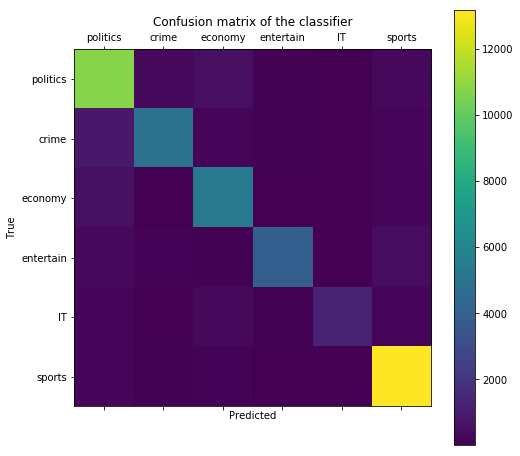

In [36]:
import matplotlib.pyplot as plt
labels = ['politics', 'crime','economy','entertain','IT','sports']
# lables = [0,1,2,3,4,5]
cm = confusion_matrix(y_test, pred)
print(cm)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

จาก Confusion Matrix แสดงถึงจำนวนคลาสที่โมเดลทำนายผลออกมาได้ แกน Y แทนคลาสจริงที่ได้ Label แกน X แทนคลาสที่โมเดล predict ได้ ยิ่งมีคลาสเยอะจะยิ่งสว่างขึ้น และจะเห็นว่า กลุ่มของ sports มีการทำนายที่แม่นที่สุด แต่เรายังสรุปอย่างอื่นไม่ได้เนื่องจาก datasets ของเรามีจำนวนคลาสที่ไม่เท่ากัน (Imbalanced class) เช่น dataset ของเรามีข่าวไอที 10295 ข่าว และมีข่าวกีฬา 67790 ข่าว หรือคิดเป็นเพียง 5% ของข่าวทั้งหมด เราจึ้งต้องคำนวน Confusion Matrix ให้อยู่ในรูปเปอร์เซ็น

[[0.89823711 0.0458903  0.08750199 0.01418015 0.01388224 0.02013472]
 [0.07619684 0.77652051 0.0328728  0.02117036 0.00526568 0.01361839]
 [0.05221823 0.00974383 0.84151183 0.00898742 0.02106271 0.01625421]
 [0.02857382 0.02294515 0.01540416 0.79069303 0.00813787 0.03265485]
 [0.02013535 0.00298601 0.04303637 0.01457959 0.59932982 0.0170596 ]
 [0.02088729 0.01320132 0.01905669 0.00818854 0.00574438 0.9628789 ]]


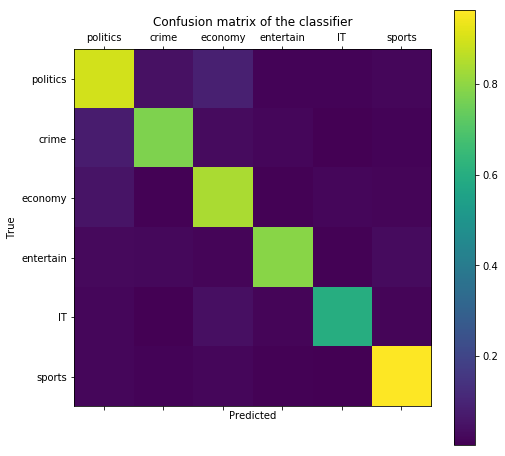

In [37]:
import numpy as np
cm = cm / cm.astype(np.float).sum(axis=1)
print(cm)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

จาก Confusion matrix ที่คิดเป็นเปอร์เซ็นจะเห็นได้ว่าโมเดลสามารถทำนายข่าวการเมืองและข่าวกีฬาได้ถูกต้องกว่าทำนายอย่างอื่น และข่าว IT สามารถทำนายได้แย่ที่สุด ซึ่งเกิดจากข่าว IT มี data ที่น้อยที่สุดคิดเป็น 5% ของข่าวทั้งหมด ซึ่งอาจจะแก้ไขได้โดย
- Tune parameters ของโมเดล หรืออาจใช้ Penalized Models และอาจจะใช้หลายๆชนิดของโมเดลมา voting กัน
- ลบ Noise ของ data ออก เช่นลบ words ที่ไม่ค่อยได้ใช้ หรือใช้เยอะเป็นคำทั่วไปในภาษาไทย
- เก็บ Data เพิ่ม <br>

โดยรวมโมเดลสามารถทำประสิทธิภาพได้ดีมีความถูกต้อง 86.71% และมีความสมเหตุสมผล ซึ่งอาจจจะเห็นว่าโมเดลมีความผิดพลาดอยู่ แต่ว่าความผิดพลาดนั้นอาจจะไม่ได้มาจากโมเดลเพียงอย่างเดียว ซึ่งอาจจะมาจาก Data หรือ การ Label ของสำนักข่าวที่มาจากการทำงานหลายคน และไม่มีวิธีวัดการจัดหมวดหมู่ที่ชัดเจน ยกตัวอย่างเช่น 
- "ครม. โยก สมชัย จากปลัดคลัง นั่งเลขาฯ สภาพัฒน์" ที่สำนักข่าวได้จัดอยู่ใน ข่าวการเมือง แต่โมเดลทำนายว่า อยู่ในหมวดหมู่ข่าวเศรษฐกิจ 
- "กำลังใจมาเต็ม โอ๊ค ยันไม่หนีคดีฟอกเงิน โพสต์เฟซฯ เย้ยเผด็จการ" ซึ่งสำนักข่าวก็จัดให้อยู่ในข่าวการเมืองเช่นกัน แต่โมเดลทำนายว่าอยู่ในหมวดหมู่ข่าวอาชญากรรม

ซึ่งก็ยังถือว่ามีความสมเหตุสมผลอยู่

## Model testing

ทดสอบการนำโมเดลไปใช้จริง โดยลองเทสกับข่าวที่อยู่คนละสำนักพิมพ์และกับที่นำข้อมูลมาเทรนและเป็นข้อมูลที่โมเดลไม่เคยเห็นมาก่อน และเป็นข่าวที่ใหม่กว่า

In [41]:
s = ['บิ๊กตู่ นิ้วมือซ้น แต่ยังฟิต ลุยถก ครม.ต่อ หลังบินกลับจากญี่ปุ่น',\
     'ครม. โยก สมชัย จากปลัดคลัง นั่งเลขาฯ สภาพัฒน์'\
     ,'กำลังใจมาเต็ม โอ๊ค ยันไม่หนีคดีฟอกเงิน โพสต์เฟซฯ เย้ยเผด็จการ'\
     ,'สื่ออังกฤษแฉ! 2 แข้งแมนฯยูไม่พอใจ โดนเปลี่ยนตัวเกมทุบนิวคาสเซิล'\
    ,'กุนซือดัตช์ตำหนิ ฟาน ไดค์ หลังเริ่มฟอร์มหลุด'\
     ,'ซีดาน เล็งคว้าแข้งจอมบุกบาร์ซา หากได้คุมแมนฯยู'\
     ,'"เฟซบุ๊ก" ยอมรับอาจส่งผลเสียต่อผู้ใช้'
    ,'เบลล่า โชว์สเต็ปเด้งกลางอากาศ นุ่งกางเกงแดง เต้นเพลง เต่างอย ฮามาก']

for i in range(len(s)):
    s[i] = s[i].replace(' ','')


news_pre = preprocess_reviews(s) 

news_sample = []

for i in range(len(s)):
    proc = word_tokenize(news_pre[i], engine='newmm') #ใช้ตัดคำภาษาไทย เช่น ฉันกำลังขึ้นรถไฟ -> 'ฉัน','กำลัง','ขึ้น','รถไฟ'
    print (proc)
    news_sample.append(proc)

news_sample = cv.transform(news_sample)
clf.predict(news_sample)

['บิ๊ก', 'ตู่', 'นิ้วมือ', 'ซ้น', 'แต่', 'ยัง', 'ฟิต', 'ลุย', 'ถก', 'ครม.', 'ต่อ', 'หลัง', 'บิน', 'กลับ', 'จาก', 'ญี่ปุ่น']
['ครม.', 'โยก', 'สม', 'ชัย', 'จาก', 'ปลัด', 'คลัง', 'นั่ง', 'เลขาฯ', 'สภาพัฒน์']
['กำลัง', 'ใจมา', 'เต็ม', 'โอ๊ค', 'ยัน', 'ไม่', 'หนี', 'คดี', 'ฟอกเงิน', 'โพสต์', 'เฟซฯ', 'เย้ย', 'เผด็จการ']
['สื่อ', 'อังกฤษ', 'แฉ', 'แข้ง', 'แมนฯยู', 'ไม่พอใจ', 'โดน', 'เปลี่ยนตัว', 'เกม', 'ทุบ', 'นิวคาสเซิล']
['กุนซือ', 'ดัตช์', 'ตำหนิ', 'ฟาน', 'ได', 'ค์', 'หลัง', 'เริ่ม', 'ฟอร์ม', 'หลุด']
['ซี', 'ดาน', 'เล็ง', 'คว้า', 'แข้ง', 'จอม', 'บุก', 'บาร์', 'ซา', 'หาก', 'ได้', 'คุม', 'แมนฯยู']
['เฟซ', 'บุ๊ก', 'ยอมรับ', 'อาจ', 'ส่ง', 'ผลเสีย', 'ต่อ', 'ผู้ใช้']
['เบล', 'ล่า', 'โชว์', 'สเต็ป', 'เด้ง', 'กลางอากาศ', 'นุ่ง', 'กางเกง', 'แดง', 'เต้น', 'เพลง', 'เต่า', 'งอย', 'ฮา', 'มาก']


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


array([0, 2, 1, 5, 5, 5, 4, 3])

โมเดลสามารถทำงานได้อย่างถูกต้องและสมเหตุสมผล

- 0 ข่าวการเมือง 
- 1 ข่าวอาชญากรรม
- 2 ข่าวเศรษฐกิจ
- 3 ข่าวบันเทิง
- 4 ข่าวไอที
- 5 ข่าวกีฬา

## Conclusion

- สามารถสร้างโมเดลที่แยกประเภทของข่าวได้โดยใช้การพาดหัว โดยแบ่งเป็น ข่าวการเมือง,ข่าวอาชญากรรม,ข่าวเศรษฐกิจ,ข่าวบันเทิง,ข่าวไอที และ ข่าวกีฬา  ซึ่งมีความแม่นยำ 86.71% โดยใช้
- โมเดลมีความ generalize สามารถนำไปใช้กับข่าวที่เป็นข่าวใหม่และคนละสำนักข่าวได้  

# Reference
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.decode
- https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
- https://stackoverflow.com/questions/18262293/how-to-open-every-file-in-a-folder
- https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python